# 0 - Minimal Example

This example is to illustrate core functionality of Oloren Chem Engine. In depth
tutorials of these features and core classes are provided in the notebooks prefixed
by '1'. Advanced usage is provided in the notebooks prefixed by '2'. Custom
implementation of functionality is provided in the notebooks prefixed by '3'.

In [1]:
import olorenchemengine as oce
import pandas as pd

df = pd.read_csv("https://storage.googleapis.com/oloren-public-data/CHEMBL%20Datasets/997_2298%20-%20VEGFR1%20(CHEMBL1868).csv")
dataset = (oce.BaseDataset(data = df.to_csv(),
    structure_col = "Smiles", property_col = "pChEMBL Value") +
           oce.CleanStructures() + 
           oce.ScaffoldSplit()
)

0 structure(s) were removed.


In [2]:
model = oce.BaseBoosting([
    oce.RandomForestModel(oce.DescriptastorusDescriptor("morgan3counts"), n_estimators=1000),
    oce.RandomForestModel(oce.OlorenCheckpoint("default"), n_estimators=1000),
    oce.ChemPropModel(epochs=20, batch_size=64)
])

model.fit(*dataset.train_dataset)

790it [00:02, 280.61it/s]
790it [00:02, 292.03it/s]
100%|██████████| 13/13 [00:00<00:00, 30.72it/s]


In [3]:
model.test(*dataset.test_dataset)

100it [00:00, 296.84it/s]
100%|██████████| 2/2 [00:00<00:00, 32.98it/s]


{'r2': 0.5452638128466992,
 'Spearman': 0.783290489303654,
 'Explained Variance': 0.6027371577838525,
 'Max Error': 2.597123105196949,
 'Mean Absolute Error': 0.4923305420201618,
 'Mean Squared Error': 0.5537947540381367,
 'Root Mean Squared Error': 0.7441738735256276}

790it [00:02, 295.19it/s]
790it [00:02, 295.27it/s]
100%|██████████| 13/13 [00:00<00:00, 29.85it/s]
790it [00:02, 297.63it/s]
100%|██████████| 13/13 [00:00<00:00, 30.62it/s]
632it [00:02, 277.87it/s]
632it [00:02, 282.80it/s]
100%|██████████| 10/10 [00:00<00:00, 23.07it/s]
158it [00:00, 338.12it/s]
100%|██████████| 3/3 [00:00<00:00, 31.77it/s]
632it [00:02, 264.96it/s]
100%|██████████| 10/10 [00:00<00:00, 18.91it/s]
158it [00:00, 737.74it/s]
632it [00:02, 297.12it/s]
632it [00:02, 296.81it/s]
100%|██████████| 10/10 [00:00<00:00, 20.71it/s]
158it [00:00, 273.91it/s]
100%|██████████| 3/3 [00:00<00:00, 24.68it/s]
632it [00:02, 301.68it/s]
100%|██████████| 10/10 [00:00<00:00, 20.26it/s]
158it [00:00, 667.96it/s]
632it [00:02, 267.43it/s]
632it [00:02, 290.21it/s]
100%|██████████| 10/10 [00:00<00:00, 24.86it/s]
158it [00:00, 275.08it/s]
100%|██████████| 3/3 [00:00<00:00, 29.57it/s]
632it [00:02, 295.25it/s]
100%|██████████| 10/10 [00:00<00:00, 20.63it/s]
158it [00:00, 689.59it/s]
632it [00:

[0.3575875392036981,
 0.5863073225865363,
 0.5182761255341704,
 0.47239690475835927,
 0.4269344221914485]

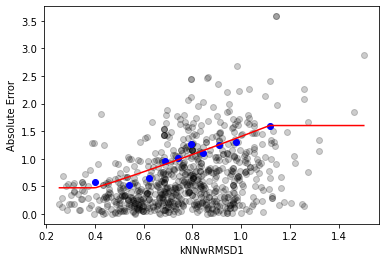

In [4]:
model.fit_cv(*dataset.train_dataset, error_model = oce.kNNwRMSD1())

In [5]:
oce.save(model, "tmp.oce")

In [6]:
results = model.predict(dataset.test_dataset[0], return_ci = True, return_vis = True)

100it [00:00, 295.30it/s]
100%|██████████| 2/2 [00:00<00:00, 14.85it/s]
100it [00:00, 304.18it/s]
100%|██████████| 2/2 [00:00<00:00, 21.12it/s]
100it [00:00, 481.00it/s]


In [7]:
results["vis"].iloc[32].render_ipynb()

In [8]:
vis = oce.VisualizeModelSim(dataset, model, eval_set="test")
vis.render_ipynb()

100it [00:00, 298.72it/s]
100%|██████████| 2/2 [00:00<00:00, 22.79it/s]
